In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Desktop/SIP/CarPrice.csv")

In [3]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.duplicated().any() #checking for duplicates

False

In [7]:
corr=df.corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


## Visualising the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

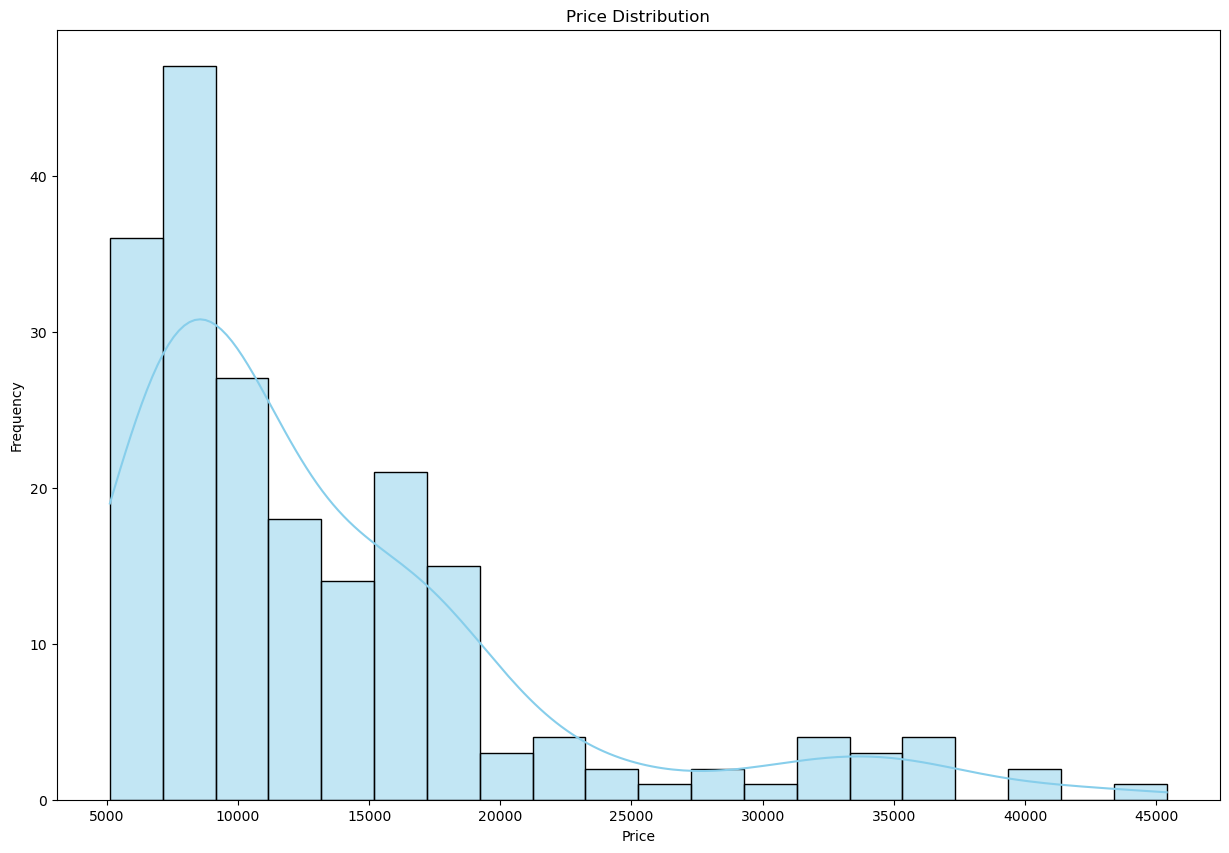

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the distribution using sns.histplot with space between bars and color
sns.histplot(data=df, x='price', bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)

# Customize the plot further if needed
ax.set_title('Price Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

symboling              Axes(0.125,0.747241;0.133621x0.132759)
wheelbase           Axes(0.285345,0.747241;0.133621x0.132759)
carlength            Axes(0.44569,0.747241;0.133621x0.132759)
carwidth            Axes(0.606034,0.747241;0.133621x0.132759)
carheight           Axes(0.766379,0.747241;0.133621x0.132759)
curbweight             Axes(0.125,0.587931;0.133621x0.132759)
enginesize          Axes(0.285345,0.587931;0.133621x0.132759)
boreratio            Axes(0.44569,0.587931;0.133621x0.132759)
stroke              Axes(0.606034,0.587931;0.133621x0.132759)
compressionratio    Axes(0.766379,0.587931;0.133621x0.132759)
horsepower             Axes(0.125,0.428621;0.133621x0.132759)
peakrpm             Axes(0.285345,0.428621;0.133621x0.132759)
citympg              Axes(0.44569,0.428621;0.133621x0.132759)
highwaympg          Axes(0.606034,0.428621;0.133621x0.132759)
price               Axes(0.766379,0.428621;0.133621x0.132759)
dtype: object

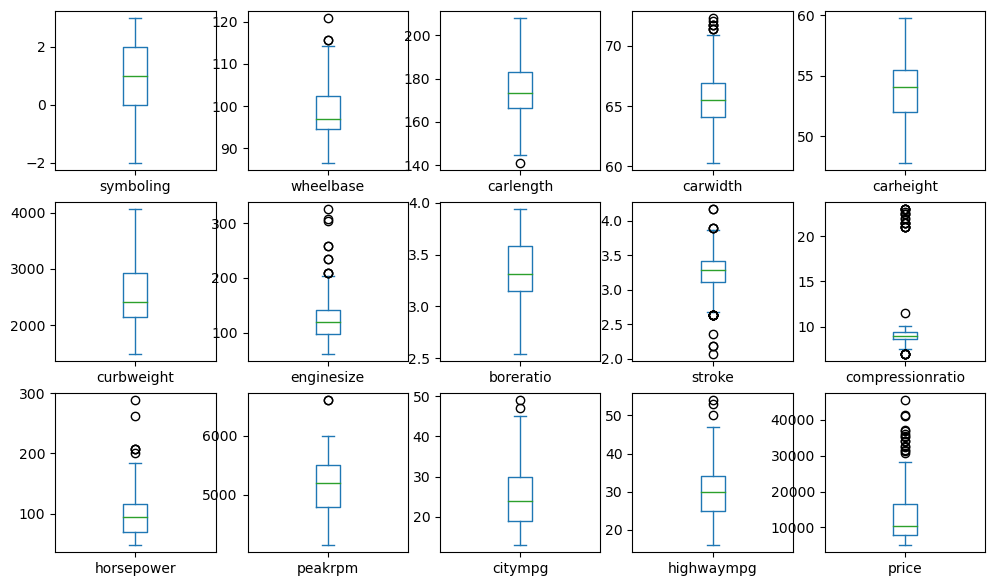

In [13]:
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(12, 12))

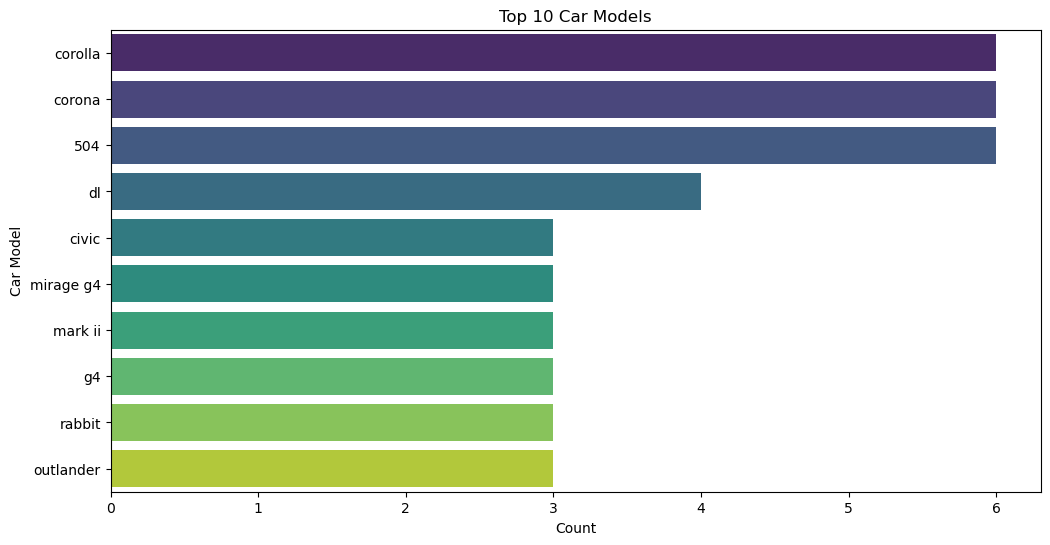

In [15]:
df[['Car_Company','Car_model']] = df['CarName'].str.split(' ',1,expand=True)
# Group the data by car model and count the occurrences
top_models = df['Car_model'].value_counts().head(10)

# Create a bar plot for the top 10 car models
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('Top 10 Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()

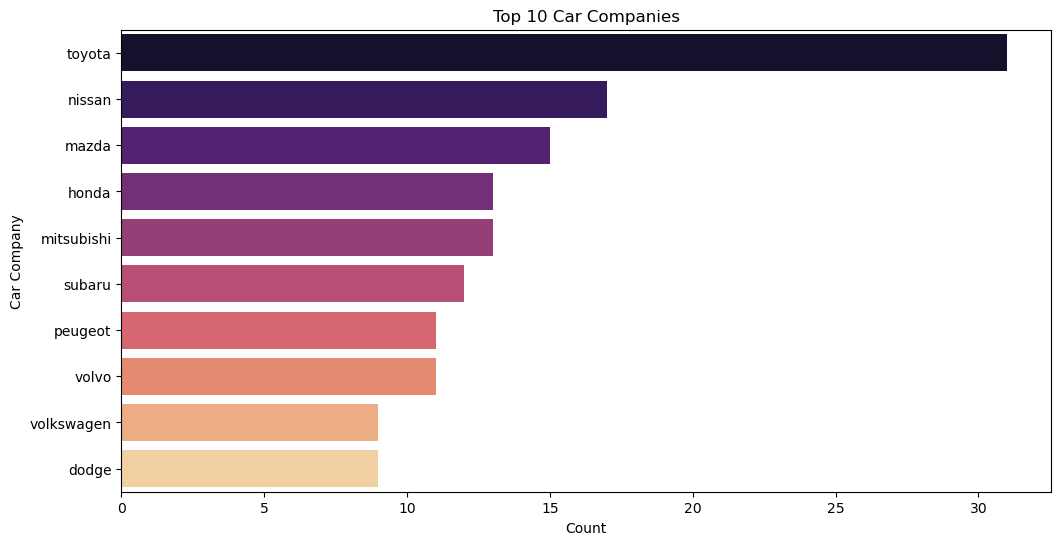

In [16]:
# Group the data by car company and count the occurrences
top_companies = df['Car_Company'].value_counts().head(10)

# Create a bar plot for the top 10 car companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Car Companies')
plt.xlabel('Count')
plt.ylabel('Car Company')
plt.show()

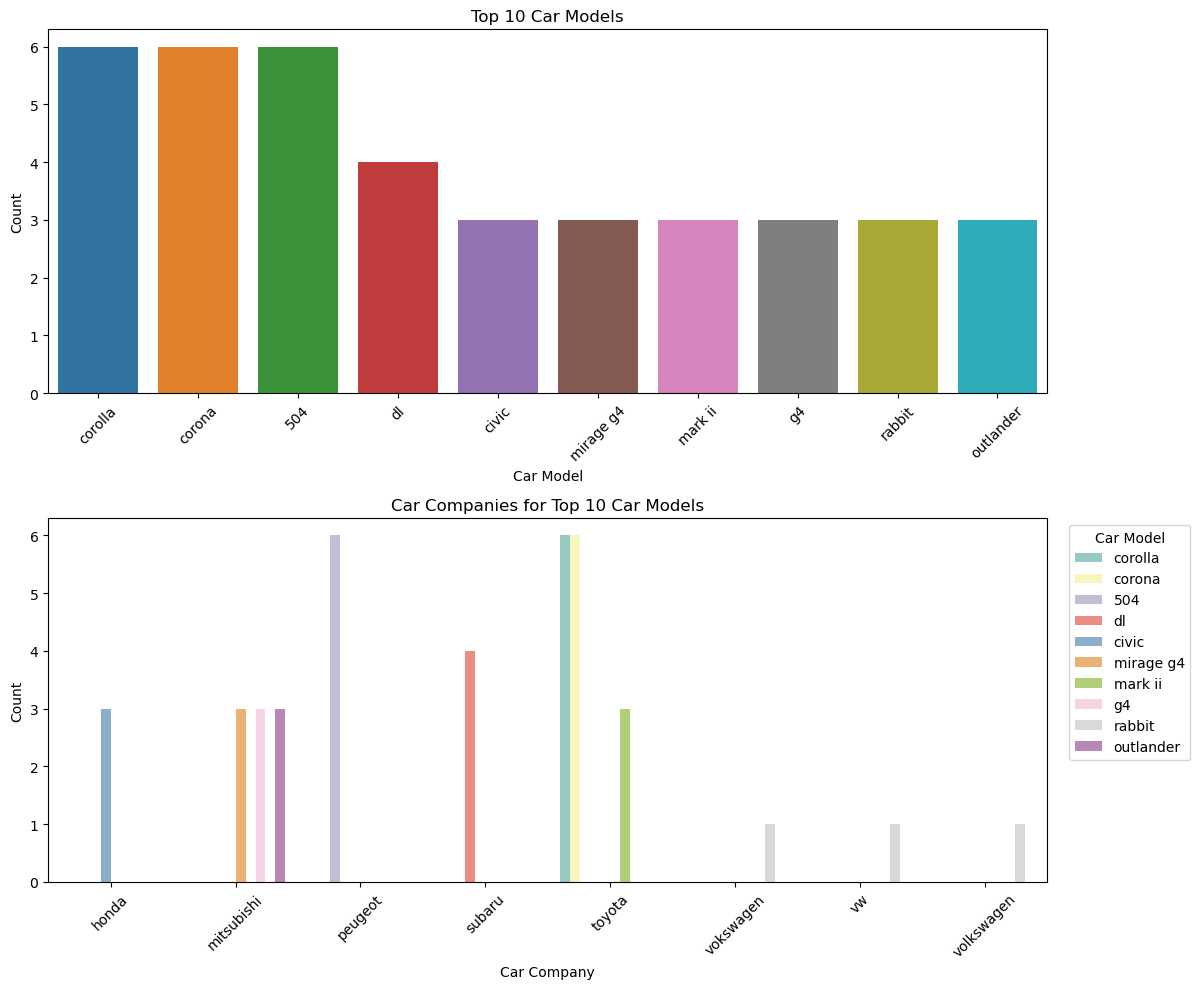

In [17]:
top_10_models = df['Car_model'].value_counts().head(10)
top_10_df = df[df['Car_model'].isin(top_10_models.index)]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot the top 10 car models
sns.countplot(data=top_10_df, x='Car_model', ax=axes[0], order=top_10_models.index)
axes[0].set_title('Top 10 Car Models')
axes[0].set_xlabel('Car Model')
axes[0].set_ylabel('Count')

# Plot the car companies corresponding to the top 10 car models
sns.countplot(data=top_10_df, x='Car_Company', ax=axes[1], hue='Car_model',
              hue_order=top_10_models.index, palette='Set3')
axes[1].set_title('Car Companies for Top 10 Car Models')
axes[1].set_xlabel('Car Company')
axes[1].set_ylabel('Count')
axes[1].legend(title='Car Model', loc='upper right', bbox_to_anchor=(1.15, 1))

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

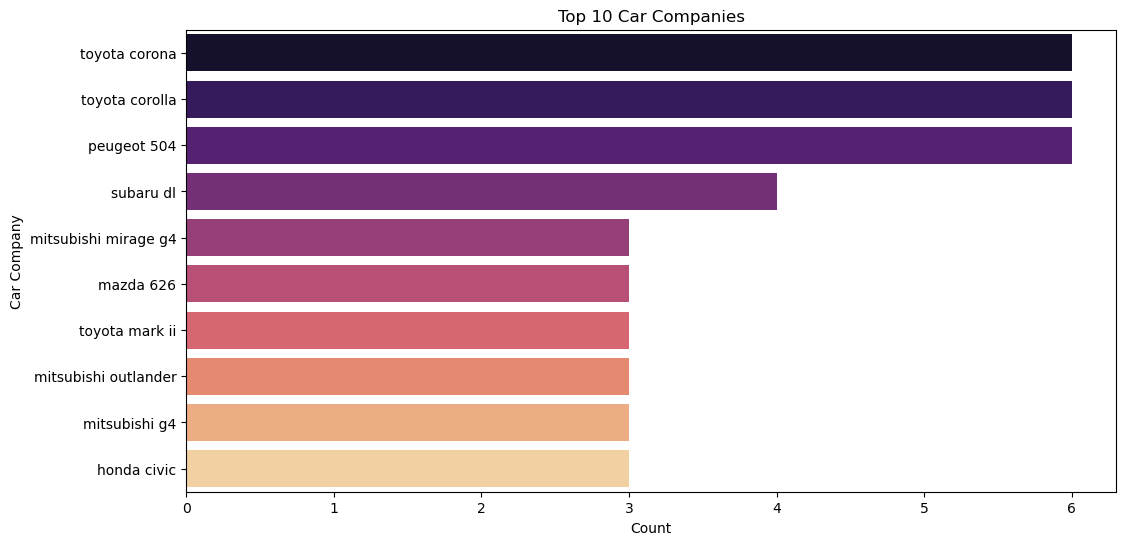

In [18]:
# Group the data by car company and count the occurrences
top_companies = df['CarName'].value_counts().head(10)

# Create a bar plot for the top 10 car companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Car Companies')
plt.xlabel('Count')
plt.ylabel('Car Company')
plt.show()

Box plots, each comparing the 'price' of automobiles with different categorical attributes (e.g., fuel type, aspiration, etc.), providing insights into the price distribution across various vehicle characteristics.


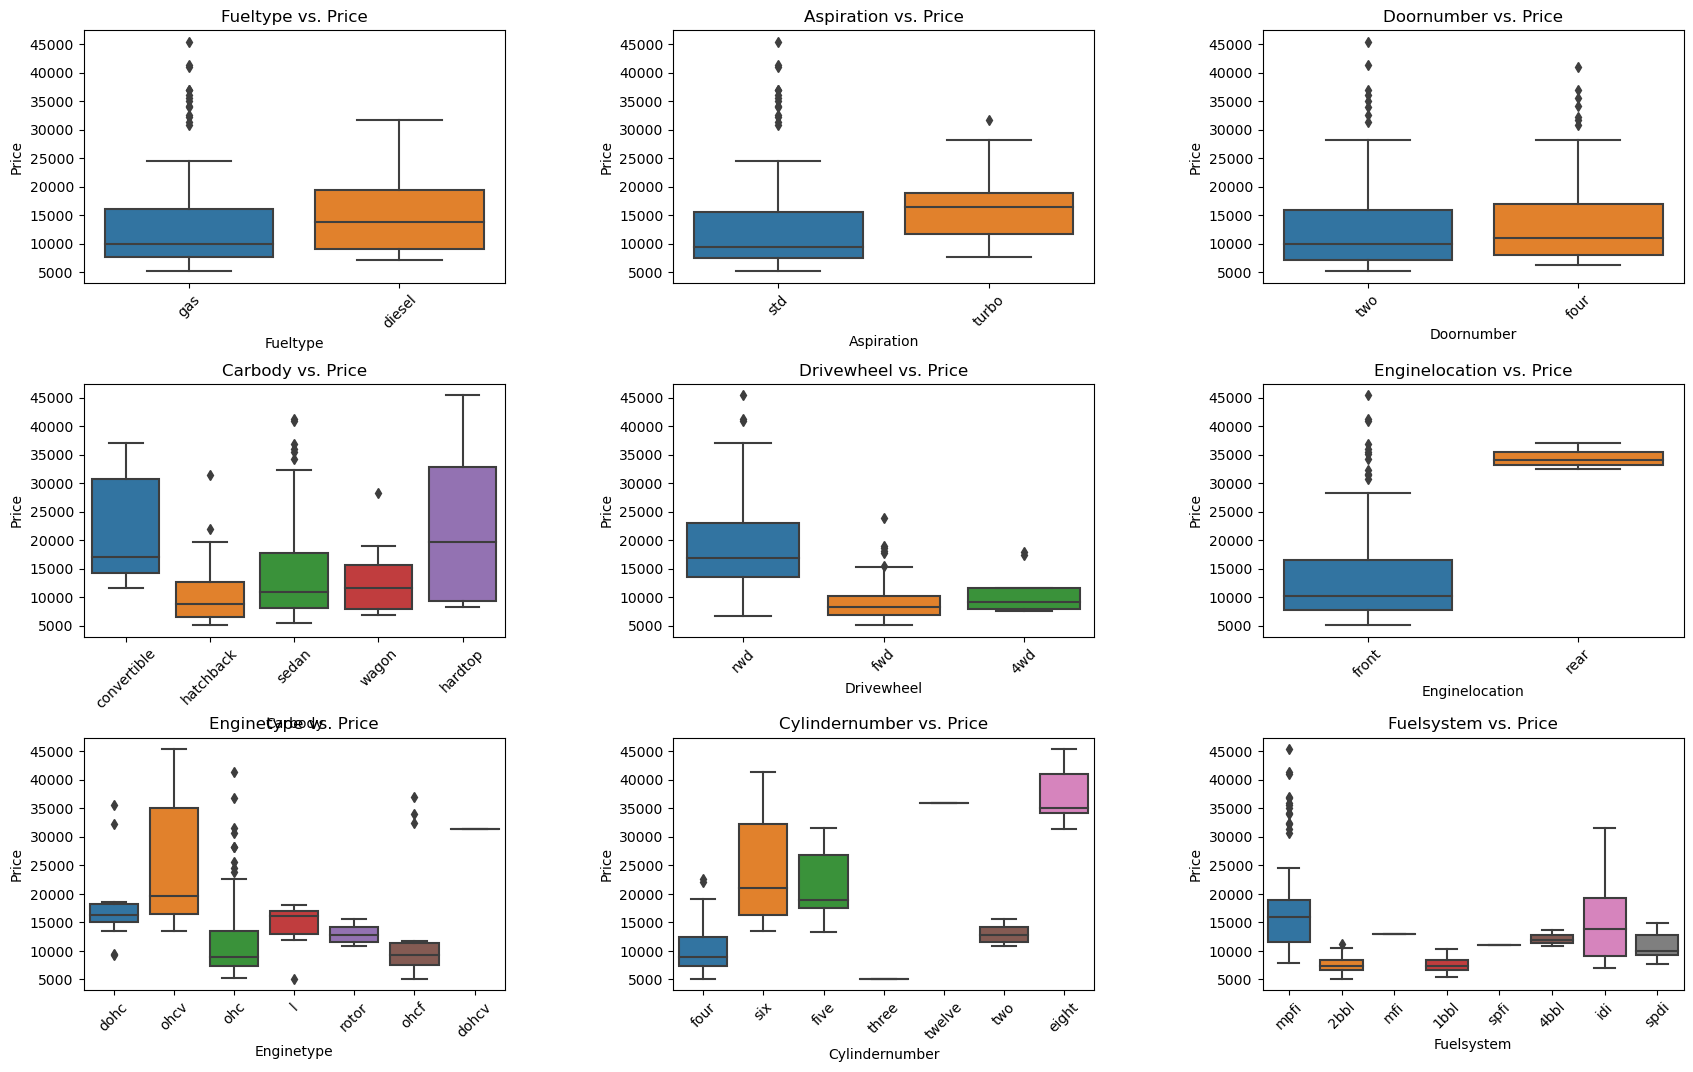

In [46]:
print("Box plots, each comparing the 'price' of automobiles with different categorical attributes (e.g., fuel type, aspiration, etc.), providing insights into the price distribution across various vehicle characteristics.")

# Create a figure and axes object with a grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define the columns for the box plots
columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create box plots for each column
for i, col in enumerate(columns):
    sns.boxplot(x=col, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs. Price')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Price')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Show the plot
plt.show()


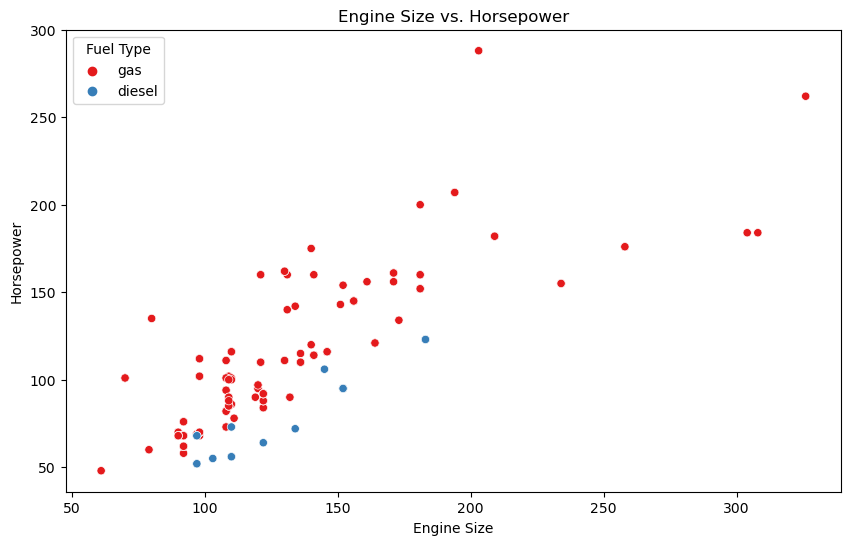

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='horsepower', hue='fueltype', palette='Set1')
plt.title('Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.legend(title='Fuel Type')
plt.show()

### Price prediction

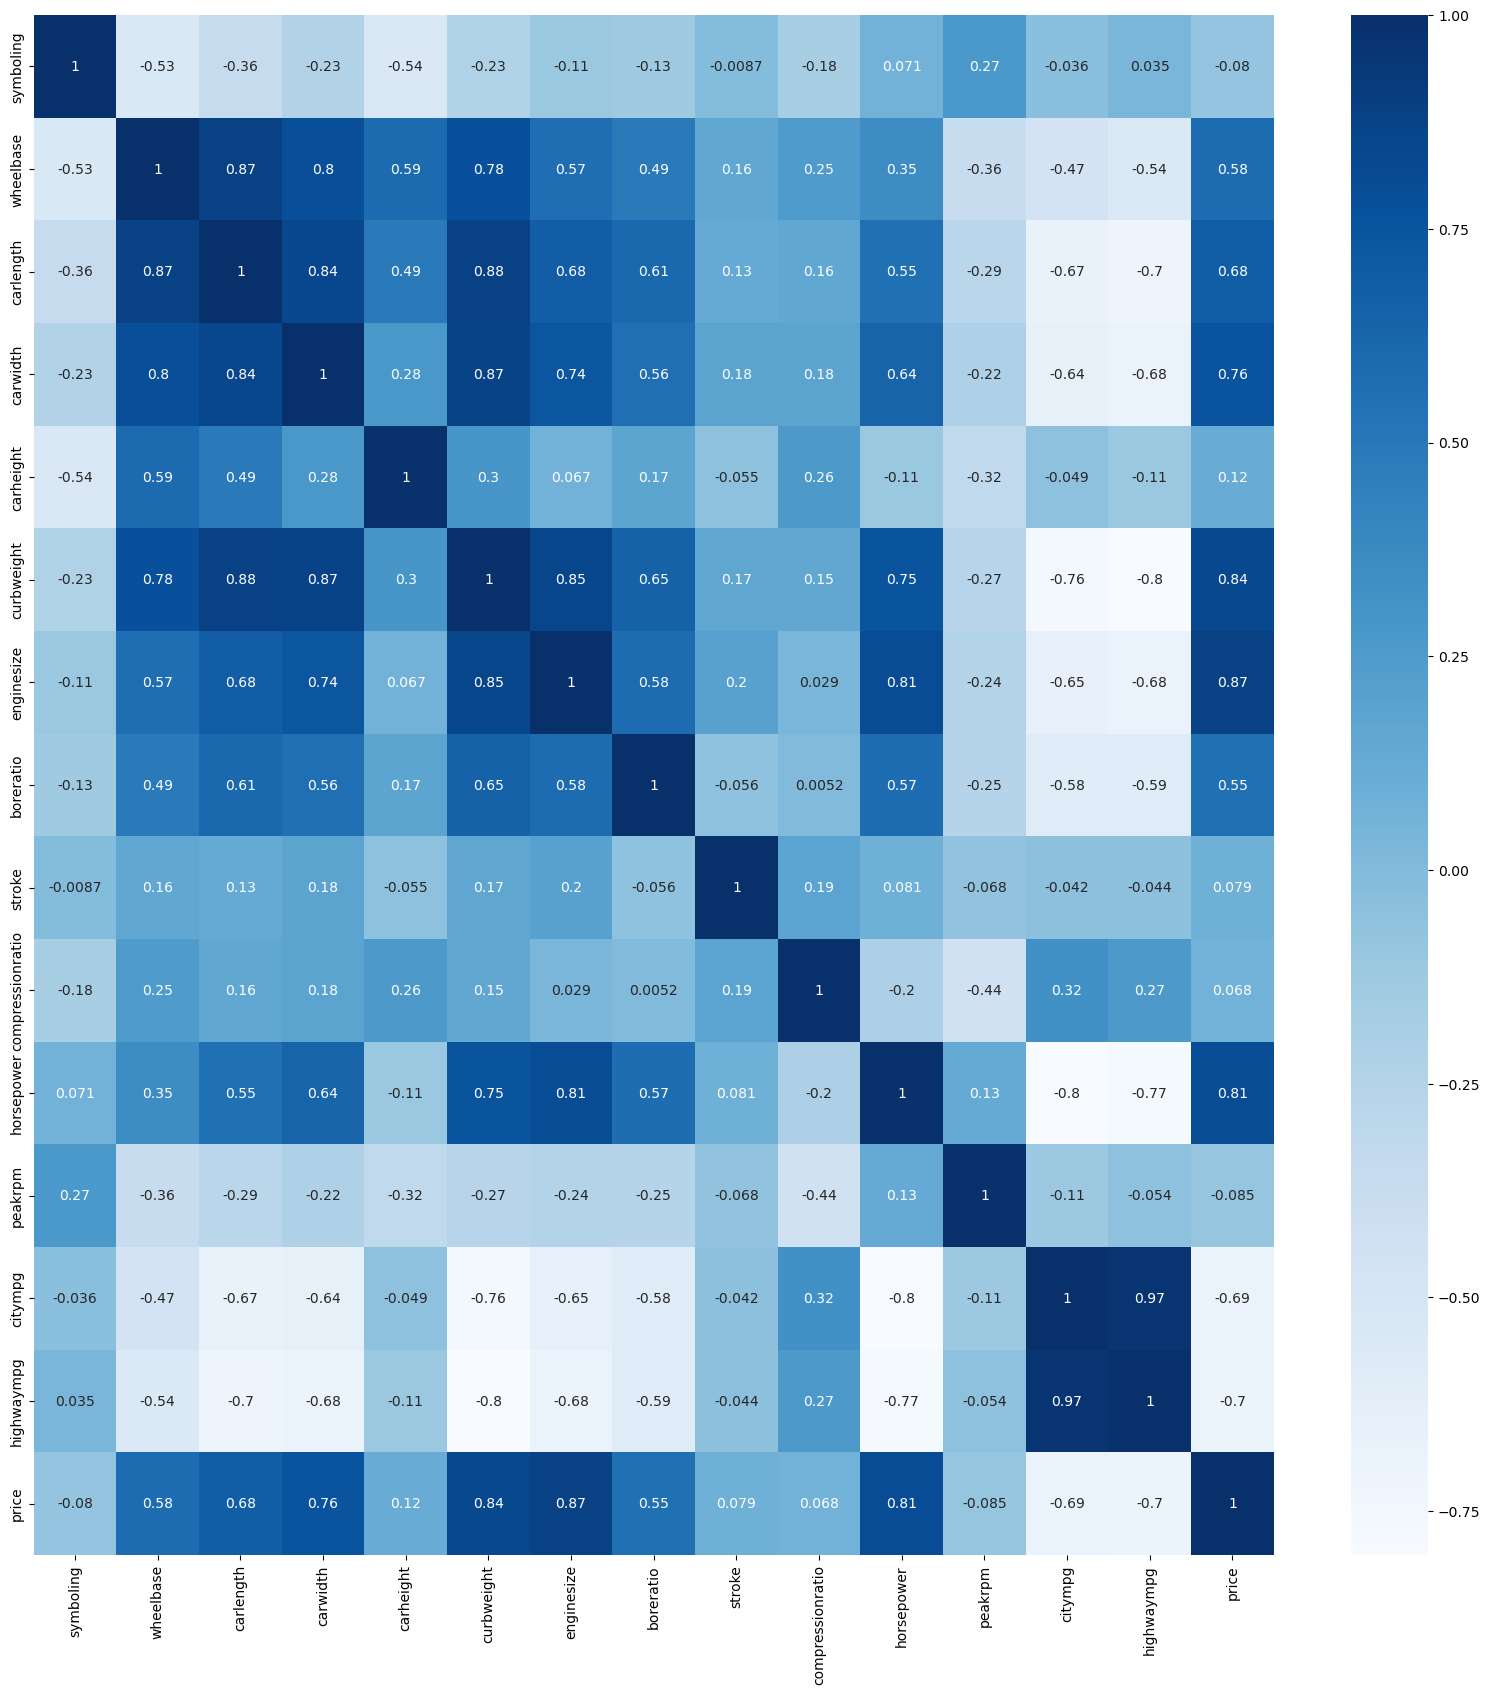

In [36]:

plt.figure(figsize=(20, 20))

# Define the colormap you want to use
colormap = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Select the colormap you want to use (e.g., 'Blues')
selected_colormap = 'Blues'

# Create the heatmap with the selected colormap
g = sns.heatmap(df[top_corr].corr(), annot=True, cmap=selected_colormap)

# Show the plot
plt.show()


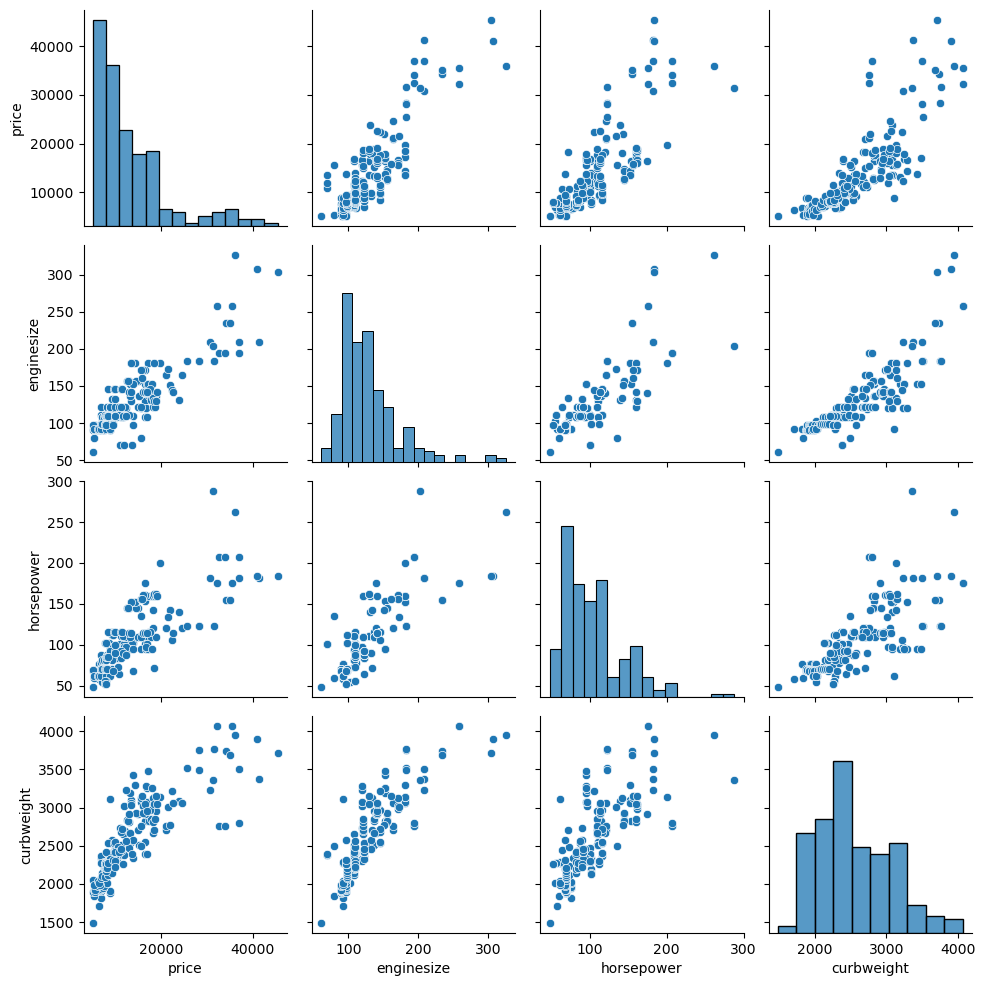

In [47]:
sns.pairplot(df[['price', 'enginesize', 'horsepower', 'curbweight']])

plt.show()

In [51]:
# Load the dataset from an Excel file
data = pd.read_csv('./Desktop/SIP/CarPrice.csv')

In [54]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Import the Pipeline class
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor

# The rest of your code remains the same...

# Drop any rows with missing target values (price)
data = data.dropna(subset=['price'])

# Define the features (X) and target variable (y)
X = data.drop(columns=['price'])
y = data['price']

# Define categorical and numerical features
categorical_features = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
numerical_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations to columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Linear Regression model
model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=StandardScaler()
)

# Create a pipeline that includes data preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

# You can now use the trained model to make price predictions for new data


Mean Squared Error: 41996859.09
Mean Absolute Error: 3700.78
R-squared (R2) Score: 0.47


In [55]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q2=df.describe().at['75%',i]
        IQR=Q2 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q2 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df
outlier_detect(df)
     

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company,Car_model
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,audi,100 ls
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,volvo,145e (sw)
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,volvo,144ea
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,volvo,244dl
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,9.0,106.0,4800.0,26.0,27.0,22470.0,volvo,246


In [56]:
col_list = []
for col in df.columns:
    if ((df[col].dtype == 'object') ):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(df)

,variables,VIF
0,symboling,4.098567
1,CarName,759.702553
2,fueltype,36.077235
3,aspiration,2.603102
4,doornumber,5.133351
5,carbody,28.535713
6,drivewheel,20.874893
7,enginelocation,2.198048
8,wheelbase,2095.967641
9,carlength,1634.418145


In [57]:
df.drop(columns=['doornumber','aspiration' ,'symboling' ,'doornumber','enginelocation'], inplace=True, axis=1) #'aspiration' 'symboling' 'doornumber'
x=df.drop(columns=['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     

(164, 22)
(41, 22)
(164,)
(41,)


In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
# constant (b - bias)
model.intercept_

# coefficients (w - weights)
model.coef_

array([-3434.53830635, -1532.41764814,   691.42589721,   422.12239462,
        1336.82188082,  -724.84006621,  1329.72228138,   185.92171064,
       -2482.89828477,    90.49518299,  -145.94072955,  1912.34287821,
         527.17441477, -1017.84285705,  -921.1609925 ,   239.68912448,
        1271.58193642,  -438.55404353, -2270.74105772,    96.14703064,
        2792.55174725,  -418.88415618])

In [60]:
y_pred=model.predict(X_test)
y_pred.dtype

dtype('float64')

In [61]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

2895.4364485682095
63.29669597228118


In [62]:
from sklearn.tree import DecisionTreeRegressor
DTRmodel = DecisionTreeRegressor(max_depth=5,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred1 = DTRmodel.predict(X_test)
print('Accuracy:',DTRmodel.score(X_test, y_test)*100)

Accuracy: 69.56785773026517


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=5, max_depth=15)
rf1.fit(X_train,y_train)
y_pred1 = rf1.predict(X_test)
print('Accuracy:',rf1.score(X_test, y_test)*100)

Accuracy: 86.65034410986384


In [64]:
Train_score = rf1.score(X_train, y_train)

# Calculate the R-squared value for the test data
Test_score = rf1.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("Train data R-squared value :", Train_score*100)
print("Test data R-squared value :", Test_score*100)

Train data R-squared value : 97.13528177392962
Test data R-squared value : 86.65034410986384


In [70]:

feature_cols = ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
target_col = 'price'
x = data[feature_cols]
y = data[target_col]

label_encoder = LabelEncoder()
for col in x.columns:
  if x[col].dtype == 'object':
    x[col] = label_encoder.fit_transform(x[col])
    
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(x_train, y_train)
    
from sqlalchemy.sql.base import ColumnSet
from pandas.core.reshape.encoding import get_dummies
new_car_data = [[3, 'gas','std','two','sedan','fwd','front',100.0,180.0,68.0,56.0,2500,'ohc','four',120,'mpfi',3.50,2.80,8.5,110,5500,30,38]]
new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)
new_car_encoded=pd.get_dummies(new_car_df, drop_first=True)
new_car_encoded=new_car_encoded.reindex(columns=x_train.columns, fill_value=0)
predicted_price = model.predict(new_car_encoded)
print("Predicted Price:",predicted_price)

Predicted Price: [12632.09458377]


In [65]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()})
act_predict.head(4)

,Actual,Predict
0,6669.0,6943.907719
1,7999.0,6794.397500
2,6338.0,7202.622769
3,8916.5,6979.670782
